In [1]:
#importing libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the df
df = pd.read_csv("Groceries_dataset.csv")

In [3]:
#Reading top elements in df

df.head()


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
#checking number of rows and columns in df
df.shape

(38765, 3)

In [5]:
#statics

df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [6]:
#checking nulls and Data type in df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
#number of unique items in the df

len(df.itemDescription.unique())

167

167 unique items

In [8]:
print("List of unique Items",df.itemDescription.unique())

List of unique Items ['tropical fruit' 'whole milk' 'pip fruit' 'other vegetables' 'rolls/buns'
 'pot plants' 'citrus fruit' 'beef' 'frankfurter' 'chicken' 'butter'
 'fruit/vegetable juice' 'packaged fruit/vegetables' 'chocolate'
 'specialty bar' 'butter milk' 'bottled water' 'yogurt' 'sausage'
 'brown bread' 'hamburger meat' 'root vegetables' 'pork' 'pastry'
 'canned beer' 'berries' 'coffee' 'misc. beverages' 'ham' 'turkey'
 'curd cheese' 'red/blush wine' 'frozen potato products' 'flour' 'sugar'
 'frozen meals' 'herbs' 'soda' 'detergent' 'grapes' 'processed cheese'
 'fish' 'sparkling wine' 'newspapers' 'curd' 'pasta' 'popcorn'
 'finished products' 'beverages' 'bottled beer' 'dessert' 'dog food'
 'specialty chocolate' 'condensed milk' 'cleaner' 'white wine' 'meat'
 'ice cream' 'hard cheese' 'cream cheese ' 'liquor' 'pickled vegetables'
 'liquor (appetizer)' 'UHT-milk' 'candy' 'onions' 'hair spray'
 'photo/film' 'domestic eggs' 'margarine' 'shopping bags' 'salt' 'oil'
 'whipped/sour cre

In [9]:
len(df.Date.unique())

728

In [10]:
#setting index as Date
df.set_index('Date',inplace=True)

df.head()

,Member_number,itemDescription
Date,,
21-07-2015,1808,tropical fruit
05-01-2015,2552,whole milk
19-09-2015,2300,pip fruit
12-12-2015,1187,other vegetables
01-02-2015,3037,whole milk


In [11]:
#converting date into a particular format
df.index=pd.to_datetime(df.index)

df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11344\2575087443.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.index=pd.to_datetime(df.index)


,Member_number,itemDescription
Date,,
2015-07-21,1808,tropical fruit
2015-01-05,2552,whole milk
2015-09-19,2300,pip fruit
2015-12-12,1187,other vegetables
2015-02-01,3037,whole milk


In [12]:
len(np.unique(df.index.year))

2

In [13]:
len(df.Member_number.unique())

3898

## There are total 38765 orders made by total 3898 unique users in 2 years.

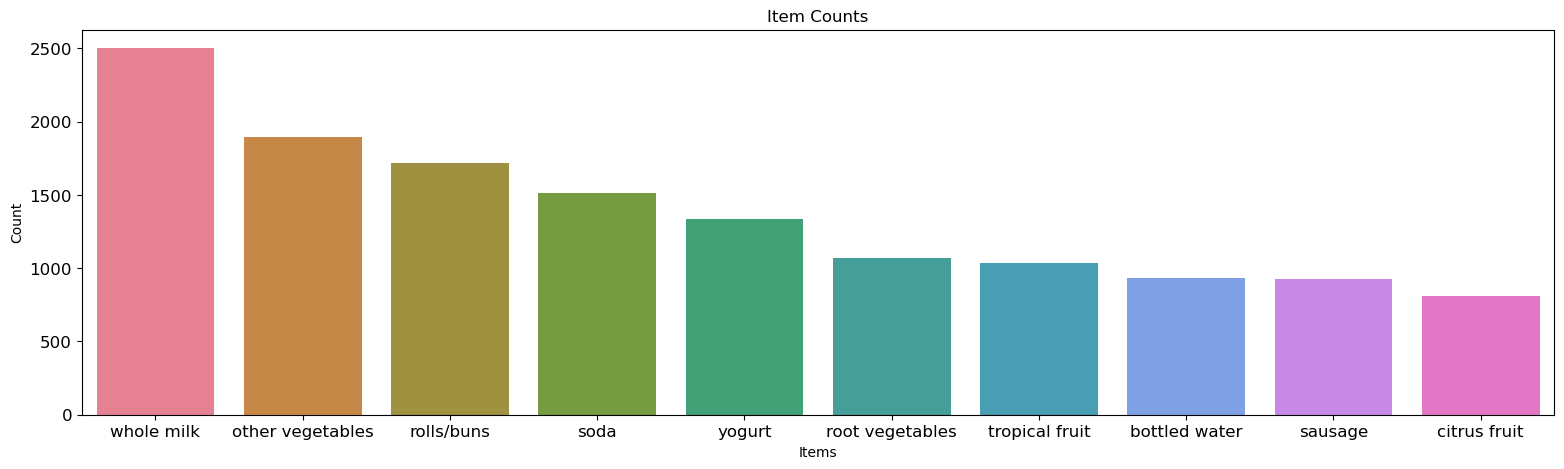

In [14]:
#Top 10 items purchased by customers


fig, ax = plt.subplots(figsize = (19,5))
ax = sns.barplot(x = df.itemDescription.value_counts().head(10).index, y = df.itemDescription.value_counts().head(10).values,palette="husl")
ax.set_ylabel("Count")
ax.set_xlabel("Items")
ax.set_title("Item Counts")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

In [15]:
product_count = df.groupby('itemDescription').nunique()
product_count .sort_values('Member_number', ascending=False).head(10)


,Member_number
itemDescription,
whole milk,1786
other vegetables,1468
rolls/buns,1363
soda,1222
yogurt,1103
tropical fruit,911
root vegetables,899
bottled water,833
sausage,803


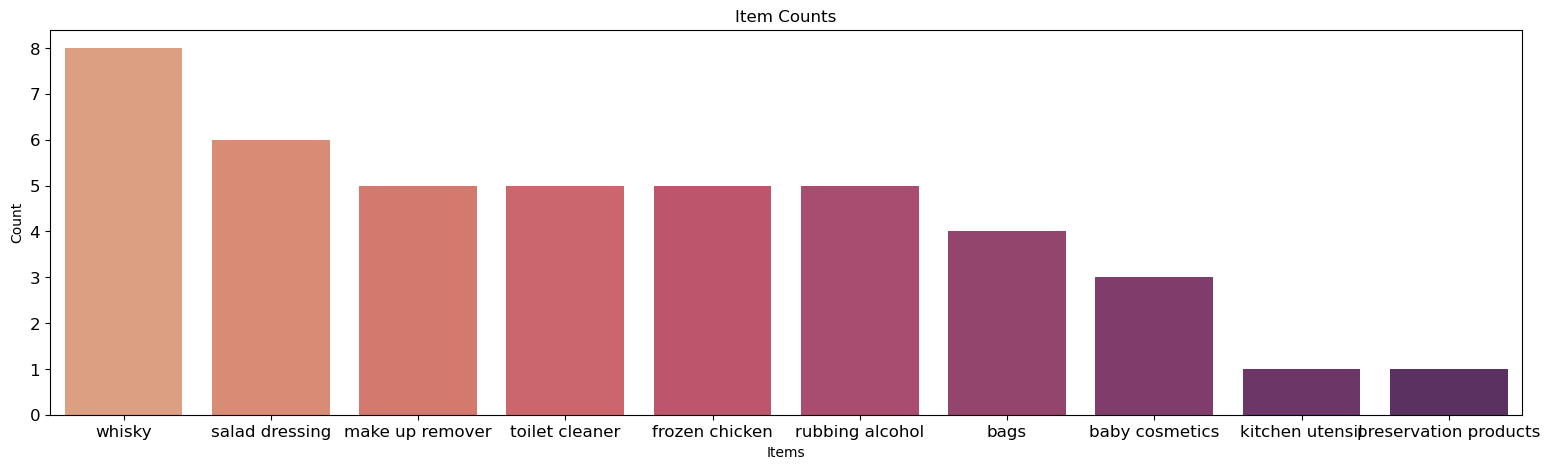

In [16]:
#lest 10 items purchased by customers


fig, ax = plt.subplots(figsize = (19,5))
ax = sns.barplot(x = df.itemDescription.value_counts().tail(10).index, y = df.itemDescription.value_counts().tail(10).values,palette="flare")
ax.set_ylabel("Count")
ax.set_xlabel("Items")
ax.set_title("Item Counts")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

In [17]:
product_count .sort_values('Member_number', ascending=False).tail(10)


,Member_number
itemDescription,
whisky,8
salad dressing,6
toilet cleaner,5
frozen chicken,5
rubbing alcohol,5
make up remover,5
bags,4
baby cosmetics,3
kitchen utensil,1


In [18]:
#grouping dataset to form a list of products bought by same customer on same date


new_df=df.groupby(['Member_number','Date'])['itemDescription'].apply(lambda x: list(x))

In [19]:
new_df.head(20)

Member_number  Date      
1000           2014-06-24                    [whole milk, pastry, salty snack]
               2015-03-15    [sausage, whole milk, semi-finished bread, yog...
               2015-05-27                           [soda, pickled vegetables]
               2015-07-24                       [canned beer, misc. beverages]
               2015-11-25                          [sausage, hygiene articles]
1001           2014-02-07                    [sausage, whole milk, rolls/buns]
               2014-12-12                                   [whole milk, soda]
               2015-01-20              [frankfurter, soda, whipped/sour cream]
               2015-04-14                                  [beef, white bread]
               2015-05-02                                  [frankfurter, curd]
1002           2014-02-09                [frozen vegetables, other vegetables]
               2014-04-26                                 [butter, whole milk]
               2015-04-26 

In [20]:
#apriori takes list as an input, hence converting dtaset to a list

trans_df = new_df.values.tolist()
trans_df[:10]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['beef', 'white bread'],
 ['frankfurter', 'curd']]

In [21]:
pip install apyori



SyntaxError: invalid syntax (320344367.py, line 1)

In [23]:
#applying apriori
from apyori import apriori
rules = apriori(trans_df, min_support=0.00030,min_confidence = 0.05,min_lift = 3,min_length = 3)
results = list(rules)
results

[RelationRecord(items=frozenset({'fruit/vegetable juice', 'liver loaf'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)]),
 RelationRecord(items=frozenset({'ham', 'pickled vegetables'}), support=0.0005346521419501437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pickled vegetables'}), items_add=frozenset({'ham'}), confidence=0.05970149253731344, lift=3.4895055970149254)]),
 RelationRecord(items=frozenset({'meat', 'roll products '}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'roll products '}), items_add=frozenset({'meat'}), confidence=0.06097560975609757, lift=3.620547812620984)]),
 RelationRecord(items=frozenset({'misc. beverages', 'salt'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'salt'}), items_add=frozenset({'misc. beverag

In [24]:
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
ordered_results = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [25]:
ordered_results


,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,liver loaf,fruit/vegetable juice,0.000401,0.120000,3.527623
1,pickled vegetables,ham,0.000535,0.059701,3.489506
2,roll products,meat,0.000334,0.060976,3.620548
3,salt,misc. beverages,0.000334,0.056180,3.561941
4,spread cheese,misc. beverages,0.000334,0.050000,3.170127
5,soups,seasonal products,0.000334,0.104167,14.704206
6,spread cheese,sugar,0.000401,0.060000,3.387849
7,butter,sausage,0.000334,0.200000,3.314064
8,whole milk,bottled beer,0.000334,0.178571,3.940950
9,canned beer,frozen vegetables,0.000334,0.138889,4.959891
